# K Nearest Neighbors

First, we import libraries in order to set up our python to be able to work with different functions.

### NB: comments will help explain what each line of code is doing here. Comments are found /below/ the line of code that they refer to

We will be using this block of code as a kind of a standard throughout all of the notebooks provided to you. In the lessons dealing with neural networks, PyTorch Library will be the only additional one to the ones mentioned below.

In [44]:
import numpy as np
#numpy is the library to deal with numbers and arrays in python
import pandas as pd
#pandas handles databases
import matplotlib.pyplot as plt
#matplotlib handles plotting in python
import scipy
#scipy or scientific python has functions for maths, science and engineering
%matplotlib inline
#this will make sure that your path
import os
#
import IPython.display as ipd
import sklearn
import librosa, librosa.display

fileList = os.listdir('./Data/drum_samples/test/')
#you might need to 

In [45]:
len(fileList)

94

### Load signals into librosa for all the files in the test folder

In [46]:
signals = [
    librosa.load('./Data/drum_samples/test/'+p)[0] for p in fileList
]

### Write a function to extract features from a librosa signal

In [47]:
def extract_features(signal):
    return[
        librosa.feature.zero_crossing_rate(signal)[0,0],
        librosa.feature.spectral_centroid(signal)[0,0],
    ]

In [48]:
features = np.array([extract_features(x) for x in signals])    

In [49]:
print(features[0])

[7.27539062e-02 3.48270664e+03]


In [50]:
print(features.shape)

(94, 2)


## Scale Features

In [51]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1,1))
features_scaled = min_max_scaler.fit_transform(features)
print(features_scaled.shape)
print(features_scaled.min(axis=0))
print(features_scaled.max(axis=0))

(94, 2)
[-1. -1.]
[1. 1.]


Plot Features

Text(0,0.5,u'Spectral Centroid (Scaled)')

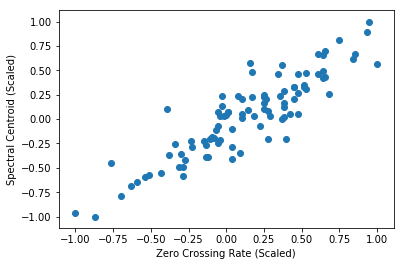

In [53]:
plt.scatter(features_scaled[:,0],features_scaled[:,1])
plt.xlabel('Zero Crossing Rate (Scaled)')
plt.ylabel('Spectral Centroid (Scaled)')

Text(0,0.5,u'Spectral Centroid (Scaled)')

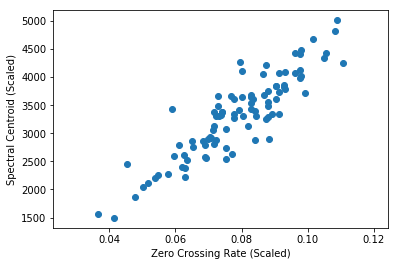

In [54]:
plt.scatter(features[:,0],features[:,1])
plt.xlabel('Zero Crossing Rate (Scaled)')
plt.ylabel('Spectral Centroid (Scaled)')

## Closest Centroids Function

In [2]:
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j,:]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    
    return idx

In [4]:
data = loadmat('data/ex7data2.mat')
X = data['X']
initial_centroids = initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

idx = find_closest_centroids(X, initial_centroids)
idx[0:3]

IOError: [Errno 2] No such file or directory: 'data/ex7data2.mat'

The output matches the expected values in the text (remember our arrays are zero-indexed instead of one-indexed so the values are one lower than in the exercise).  Next we need a function to compute the centroid of a cluster.  The centroid is simply the mean of all of the examples currently assigned to the cluster.

In [3]:
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i,:] = (np.sum(X[indices,:], axis=1) / len(indices[0])).ravel()
    
    return centroids

In [5]:
compute_centroids(X, idx, 3)

NameError: name 'X' is not defined

In [6]:
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    
    return idx, centroids

In [7]:
idx, centroids = run_k_means(X, initial_centroids, 10)

NameError: name 'X' is not defined

In [8]:
cluster1 = X[np.where(idx == 0)[0],:]
cluster2 = X[np.where(idx == 1)[0],:]
cluster3 = X[np.where(idx == 2)[0],:]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.legend()

NameError: name 'X' is not defined